# Introduction to Pandas and Matplotlib

This tutorial is...
* introductory and geared towards people new to python, but familiar with STATA, MATLAB, R, etc.
* interactive with simple exercises along the way

## Background

[**Pandas**](http://pandas.pydata.org/pandas-docs/stable/) and [**Matplotlib**](https://matplotlib.org/contents.html) are two of the most popular python packages for data analysis and visualization

They have both gained substantial popularity in recent years, partly due to the rise of fields such as data science and machine learning

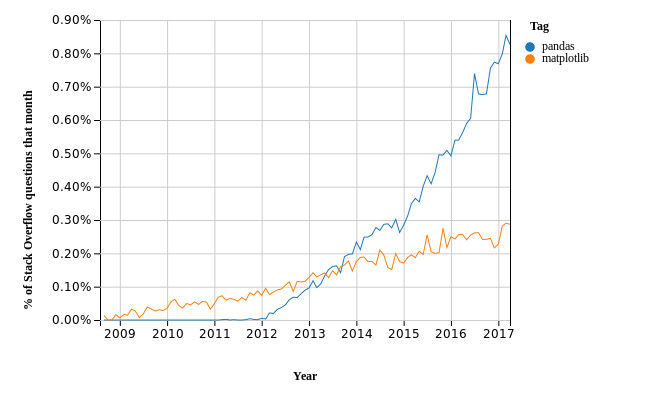

In [1]:
from IPython.display import Image
Image('./popularity.jpg')

Both packages are extensive and flexible in their nature
* Sometimes difficult to find what you want to do (although it is almost always possible)
* The solution is not always the most elegant

Both packages are well-supported and actively developed

## What is pandas?

Pandas provides fundamental structures for working with data (`Series`, `DataFrames`)

Data structures have methods for manipulating data eg. indexing, sorting, grouping, filling in missing data

Pandas does not provide modeling tools eg. regression, prediction
* These tools are found in packages such as `scikit-learn` and `statsmodels`, which are built on top of pandas

In [2]:
# Import the package

import pandas as pd

## DataFrames

A `DataFrame` combines multiple 'columns' of data into a two-dimensional object, similar to a spreadsheet

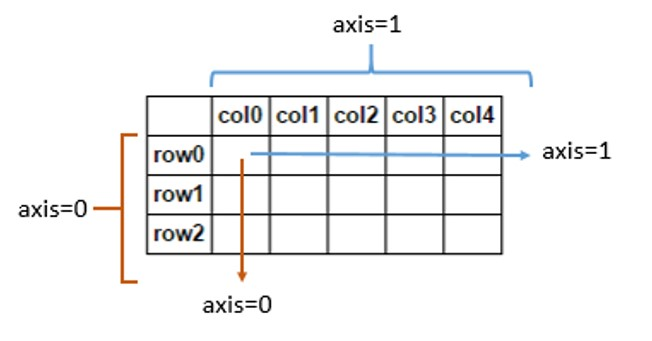

In [3]:
Image('./dataframe.jpg')

We will create a `DataFrame` by reading in a Stata file and assigning it to the variable name `df`

### Info on the data set

* The data come from ['Assessing the Rate of Replication in Economics'](https://www.aeaweb.org/articles?id=10.1257/aer.p20171119), *American Economics Review: Papers & Proceedings*, 2017
* The dataframe `volume` contains 70 empirical papers from AER's 100th volume
* `volWoS`: number of Web of Science citations
* `volTop200Econ`: number of Top 200 economics journal citations
* `volGScites`: number of Google Scholar citations

In [4]:
volume = pd.read_stata('./data/VolumePaperData.dta')
volume.head()

,volID,volTitle,volCoder,volWoS,volTop200Econ,volGScites,volField
0,2,Learning about a New Technology: Pineapple in ...,3.0,176,108.0,1246,Development
1,3,Multiple-Product Firms and Product Switching,5.0,111,74.0,764,Labor/IO
2,4,"Momma's Got the Pill"": How Anthony Comstock an...",5.0,23,15.0,98,Labor/IO
3,5,Matching and Sorting in Online Dating,1.0,75,23.0,326,Labor/IO
4,6,"Entry, Exit, and Investment-Specific Technical...",2.0,9,9.0,38,Macro/Int/Trade


In [5]:
type(volume)

pandas.core.frame.DataFrame

In [6]:
volume.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 0 to 69
Data columns (total 7 columns):
volID            70 non-null int16
volTitle         70 non-null object
volCoder         70 non-null float32
volWoS           70 non-null int32
volTop200Econ    70 non-null float64
volGScites       70 non-null int16
volField         70 non-null category
dtypes: category(1), float32(1), float64(1), int16(2), int32(1), object(1)
memory usage: 2.7+ KB


By default, pandas will recognize column headers from the stata file

In [7]:
volume.columns

Index(['volID', 'volTitle', 'volCoder', 'volWoS', 'volTop200Econ',
       'volGScites', 'volField'],
      dtype='object')

We can access individual columns of data, returning a `Series`

In [8]:
volume['volWoS'].head()

0    176
1    111
2     23
3     75
4      9
Name: volWoS, dtype: int32

In [9]:
volume[['volTitle', 'volWoS']].head()

,volTitle,volWoS
0,Learning about a New Technology: Pineapple in ...,176
1,Multiple-Product Firms and Product Switching,111
2,"Momma's Got the Pill"": How Anthony Comstock an...",23
3,Matching and Sorting in Online Dating,75
4,"Entry, Exit, and Investment-Specific Technical...",9


We can add a new column like so

In [10]:
volume['totalCites'] = volume['volWoS'] + volume['volTop200Econ'] + volume['volGScites']
volume.head()

,volID,volTitle,volCoder,volWoS,volTop200Econ,volGScites,volField,totalCites
0,2,Learning about a New Technology: Pineapple in ...,3.0,176,108.0,1246,Development,1530.0
1,3,Multiple-Product Firms and Product Switching,5.0,111,74.0,764,Labor/IO,949.0
2,4,"Momma's Got the Pill"": How Anthony Comstock an...",5.0,23,15.0,98,Labor/IO,136.0
3,5,Matching and Sorting in Online Dating,1.0,75,23.0,326,Labor/IO,424.0
4,6,"Entry, Exit, and Investment-Specific Technical...",2.0,9,9.0,38,Macro/Int/Trade,56.0


If we want to know the average number of Web of Science citations...

In [11]:
volume['volWoS'].mean()

42.07142857142857

`.describe()` returns useful summary statistics 

In [12]:
volume['volWoS'].describe()

count     70.000000
mean      42.071429
std       43.070660
min        1.000000
25%       17.250000
50%       28.500000
75%       51.000000
max      195.000000
Name: volWoS, dtype: float64

### Exercises

#### Add a column to `volume` with the proportion of citations that are from top 200 journals (out of total Google Scholar citations)

<button data-toggle="collapse" data-target="#sol1" class='btn btn-primary'>Solution</button>
<div id="sol1" class="collapse">
```python
volume['proportion'] = volume['volTop200Econ'] / volume['volGScites']
```

#### Find the means of Top 200 and Google Scholar citations

<button data-toggle="collapse" data-target="#sol2" class='btn btn-primary'>Solution</button>
<div id="sol2" class="collapse">
```python
volume[['volTop200Econ', 'volGScites']].mean()
```

#### Find the median of Web of Science citations

<button data-toggle="collapse" data-target="#sol3" class='btn btn-primary'>Solution</button>
<div id="sol3" class="collapse">
```python
volume['volWoS'].median()
```

#### Create a table of summary statistics of Top 200 cites and Google Scholar cites

<button data-toggle="collapse" data-target="#sol4" class='btn btn-primary'>Solution</button>
<div id="sol4" class="collapse">
```python
volume[['volTop200Econ', 'volGScites']].describe()
```

#### Create a table of summary statistics of the paper's fields

<button data-toggle="collapse" data-target="#sol5" class='btn btn-primary'>Solution</button>
<div id="sol5" class="collapse">
```python
volume['volField'].describe()
```

## Selecting and filtering

We can use integer slicing to select rows as follows

In [13]:
volume[:5]

,volID,volTitle,volCoder,volWoS,volTop200Econ,volGScites,volField,totalCites
0,2,Learning about a New Technology: Pineapple in ...,3.0,176,108.0,1246,Development,1530.0
1,3,Multiple-Product Firms and Product Switching,5.0,111,74.0,764,Labor/IO,949.0
2,4,"Momma's Got the Pill"": How Anthony Comstock an...",5.0,23,15.0,98,Labor/IO,136.0
3,5,Matching and Sorting in Online Dating,1.0,75,23.0,326,Labor/IO,424.0
4,6,"Entry, Exit, and Investment-Specific Technical...",2.0,9,9.0,38,Macro/Int/Trade,56.0


We might want to find the top cited papers

First we will sort our values by a column in the dataframe

In [14]:
pd.set_option('max_colwidth', 100)  # adjust column width

volume[['volTitle', 'volTop200Econ']].sort_values(by='volTop200Econ', ascending=False)[:5]

,volTitle,volTop200Econ
0,Learning about a New Technology: Pineapple in Ghana,108.0
33,What Causes Industry Agglomeration? Evidence from Coagglomeration Patterns,93.0
15,"Social Preferences, Beliefs, and the Dynamics of Free Riding in Public Goods Experiments",86.0
1,Multiple-Product Firms and Product Switching,74.0
35,Are Risk Aversion and Impatience Related to Cognitive Ability?,73.0


Another way to select rows is to use row labels, ie. set a row index

Similar to the column labels, we can add row labels (the index)

In [15]:
volume.set_index('volTitle').head()

,volID,volCoder,volWoS,volTop200Econ,volGScites,volField,totalCites
volTitle,,,,,,,
Learning about a New Technology: Pineapple in Ghana,2,3.0,176,108.0,1246,Development,1530.0
Multiple-Product Firms and Product Switching,3,5.0,111,74.0,764,Labor/IO,949.0
"Momma's Got the Pill"": How Anthony Comstock and Griswold v. Connecticut Shaped US Childbearing",4,5.0,23,15.0,98,Labor/IO,136.0
Matching and Sorting in Online Dating,5,1.0,75,23.0,326,Labor/IO,424.0
"Entry, Exit, and Investment-Specific Technical Change",6,2.0,9,9.0,38,Macro/Int/Trade,56.0


Note: we haven't actually changed `volume`

In [16]:
volume.head()

,volID,volTitle,volCoder,volWoS,volTop200Econ,volGScites,volField,totalCites
0,2,Learning about a New Technology: Pineapple in Ghana,3.0,176,108.0,1246,Development,1530.0
1,3,Multiple-Product Firms and Product Switching,5.0,111,74.0,764,Labor/IO,949.0
2,4,"Momma's Got the Pill"": How Anthony Comstock and Griswold v. Connecticut Shaped US Childbearing",5.0,23,15.0,98,Labor/IO,136.0
3,5,Matching and Sorting in Online Dating,1.0,75,23.0,326,Labor/IO,424.0
4,6,"Entry, Exit, and Investment-Specific Technical Change",2.0,9,9.0,38,Macro/Int/Trade,56.0


Need to overwrite `volume` with the new copy

In [17]:
volume = volume.set_index('volTitle')   # Can also use volume.set_index('volTitle', inplace=True)
volume.head()

,volID,volCoder,volWoS,volTop200Econ,volGScites,volField,totalCites
volTitle,,,,,,,
Learning about a New Technology: Pineapple in Ghana,2,3.0,176,108.0,1246,Development,1530.0
Multiple-Product Firms and Product Switching,3,5.0,111,74.0,764,Labor/IO,949.0
"Momma's Got the Pill"": How Anthony Comstock and Griswold v. Connecticut Shaped US Childbearing",4,5.0,23,15.0,98,Labor/IO,136.0
Matching and Sorting in Online Dating,5,1.0,75,23.0,326,Labor/IO,424.0
"Entry, Exit, and Investment-Specific Technical Change",6,2.0,9,9.0,38,Macro/Int/Trade,56.0


In [18]:
volume.loc['Matching and Sorting in Online Dating']

volID                   5
volCoder                1
volWoS                 75
volTop200Econ          23
volGScites            326
volField         Labor/IO
totalCites            424
Name: Matching and Sorting in Online Dating, dtype: object

In [19]:
volume.loc[['Matching and Sorting in Online Dating', 'Learning about a New Technology: Pineapple in Ghana']]

,volID,volCoder,volWoS,volTop200Econ,volGScites,volField,totalCites
volTitle,,,,,,,
Matching and Sorting in Online Dating,5,1.0,75,23.0,326,Labor/IO,424.0
Learning about a New Technology: Pineapple in Ghana,2,3.0,176,108.0,1246,Development,1530.0


We can also sort our index (this is recommended for efficient filtering)

In [20]:
volume.sort_index(inplace=True)
volume.head()

,volID,volCoder,volWoS,volTop200Econ,volGScites,volField,totalCites
volTitle,,,,,,,
A New Approach to Estimating the Production Function for Housing,37,5.0,13,11.0,74,Applied (gen.),98.0
A Study of the Internal Organization of a Bidding Cartel,32,5.0,21,11.0,127,Labor/IO,159.0
A Theory of Optimal Random Crackdowns,44,5.0,4,2.0,41,Applied (gen.),47.0
An Exploration of Technology Diffusion,84,2.0,36,16.0,226,Macro/Int/Trade,278.0
Are Health Insurance Markets Competitive?,58,5.0,29,16.0,139,Labor/IO,184.0


In [21]:
volume.loc['An Exploration of Technology Diffusion', 'volField']

'Macro/Int/Trade'

In [22]:
volume.iloc[3, 5]

'Macro/Int/Trade'

We can also create a multiindex that contains multiple levels in the index

In [23]:
volume = volume.reset_index().set_index(['volField', 'volTitle']).sort_index()  # This is called method chaining
volume.head()

volID  \
volField       volTitle                                                                                          
Applied (gen.) A New Approach to Estimating the Production Function for Housing                             37   
               A Theory of Optimal Random Crackdowns                                                        44   
               Doing Well by Doing Good? Green Office Buildings                                            101   
               Emissions Trading, Electricity Restructuring, and Investment in Pollution Abatement          35   
               Is a Donor in Hand Better than Two in the Bush? Evidence from a Natural Field Experiment     39   

                                                                                                         volCoder  \
volField       volTitle                                                                                             
Applied (gen.) A New Approach to Estimating the Production Function for Housing                               5.0   
               A Theory of Optimal Random Crackdowns                                                          5.0   
               Doing Well by Doing Good? Green Office Buildings                                               4.0   
               Emissions Trading, Electricity Restructuring, and Investment in Pollution Abatement            3.0   
               Is a Donor in Hand Better than Two in the Bush? Evidence from a Natural Field Experiment       4.0   

                                                                                                         volWoS  \
volField       volTitle                                                                                           
Applied (gen.) A New Approach to Estimating the Production Function for Housing                              13   
               A Theory of Optimal Random Crackdowns                                                          4   
               Doing Well by Doing Good? Green Office Buildings                                              69   
               Emissions Trading, Electricity Restructuring, and Investment in Pollution Abatement           29   
               Is a Donor in Hand Better than Two in the Bush? Evidence from a Natural Field Experiment      18   

                                                                                                         volTop200Econ  \
volField       volTitle                                                                                                  
Applied (gen.) A New Approach to Estimating the Production Function for Housing                                   11.0   
               A Theory of Optimal Random Crackdowns                                                               2.0   
               Doing Well by Doing Good? Green Office Buildings                                                   18.0   
               Emissions Trading, Electricity Restructuring, and Investment in Pollution Abatement                16.0   
               Is a Donor in Hand Better than Two in the Bush? Evidence from a Natural Field Experiment           10.0   

                                                                                                         volGScites  \
volField       volTitle                                                                                               
Applied (gen.) A New Approach to Estimating the Production Function for Housing                                  74   
               A Theory of Optimal Random Crackdowns                                                             41   
               Doing Well by Doing Good? Green Office Buildings                                                 681   
               Emissions Trading, Electricity Restructuring, and Investment in Pollution Abatement              113   
               Is a Donor in Hand Better than Two in the Bush? Evidence from a Natural Field Experiment        

In [24]:
volume.loc['Development']

,volID,volCoder,volWoS,volTop200Econ,volGScites,totalCites
volTitle,,,,,,
Can Higher Prices Stimulate Product Use? Evidence from a Field Experiment in Zambia,97,1.0,44,21.0,265,330.0
"Determinants of Redistributive Politics: An Empirical Analysis of Land Reforms in West Bengal, India",64,3.0,12,9.0,63,84.0
Inherited Trust and Growth,85,3.0,102,44.0,536,682.0
Learning about a New Technology: Pineapple in Ghana,2,3.0,176,108.0,1246,1530.0
Multinationals and Anti-Sweatshop Activism,9,4.0,21,8.0,134,163.0
Watta Satta: Bride Exchange and Women's Welfare in Rural Pakistan,73,3.0,6,4.0,37,47.0


Alternatively, we can filter our dataframe using *boolean conditions*

In [25]:
volume.reset_index(inplace=True)

volume['volField'] == 'Development'

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7      True
8      True
9      True
10     True
11     True
12     True
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
      ...  
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
52    False
53    False
54    False
55    False
56    False
57    False
58    False
59    False
60    False
61    False
62    False
63    False
64    False
65    False
66    False
67    False
68    False
69    False
Name: volField, Length: 70, dtype: bool

Selecting rows with this boolean condition will return only rows of the dataframe where `volField == 'Development'` is `True`

In [26]:
volume[volume['volField'] == 'Development']

,volField,volTitle,volID,volCoder,volWoS,volTop200Econ,volGScites,totalCites
7,Development,Can Higher Prices Stimulate Product Use? Evidence from a Field Experiment in Zambia,97,1.0,44,21.0,265,330.0
8,Development,"Determinants of Redistributive Politics: An Empirical Analysis of Land Reforms in West Bengal, I...",64,3.0,12,9.0,63,84.0
9,Development,Inherited Trust and Growth,85,3.0,102,44.0,536,682.0
10,Development,Learning about a New Technology: Pineapple in Ghana,2,3.0,176,108.0,1246,1530.0
11,Development,Multinationals and Anti-Sweatshop Activism,9,4.0,21,8.0,134,163.0
12,Development,Watta Satta: Bride Exchange and Women's Welfare in Rural Pakistan,73,3.0,6,4.0,37,47.0


In [27]:
volume[(volume['volField'] == 'Development') & (volume['volWoS'] > 100)]

,volField,volTitle,volID,volCoder,volWoS,volTop200Econ,volGScites,totalCites
9,Development,Inherited Trust and Growth,85,3.0,102,44.0,536,682.0
10,Development,Learning about a New Technology: Pineapple in Ghana,2,3.0,176,108.0,1246,1530.0


### Exercises

#### How many papers in the sample have over 100 Google Scholar citations?
* Hint: use `len()` to find the length of a dataframe

<button data-toggle="collapse" data-target="#sol6" class='btn btn-primary'>Solution</button>
<div id="sol6" class="collapse">
```python
len(volume[volume['volGScites'] > 100])
```
```
44
```

#### How many 'Labor/IO' papers have over 100 Google Scholar citations?

<button data-toggle="collapse" data-target="#sol7" class='btn btn-primary'>Solution</button>
<div id="sol7" class="collapse">
```python
len(volume[(volume['volGScites'] > 100) & (volume['volField'] == 'Labor/IO')])
```
```
10
```

#### Of all development papers, which has the highest number of Google Scholar citations?

<button data-toggle="collapse" data-target="#sol8" class='btn btn-primary'>Solution</button>
<div id="sol8" class="collapse">
```python
volume[volume['volField'] == 'Development'].sort_values(by='volGScites', ascending=False)[:1]
```
```
Learning about a New Technology: Pineapple in Ghana
```

## Grouping and aggregating data

We might want to summarize our data by grouping it by fields

To do this, we will use the `.groupby()` function

In [28]:
volume.reset_index(inplace=True)

grouped = volume.groupby('volField')
grouped

In [29]:
grouped.groups

{'Applied (gen.)': Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64'),
 'Behavioral/Exp.': Int64Index([26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42,
             43, 44],
            dtype='int64'),
 'Development': Int64Index([7, 8, 9, 10, 11, 12], dtype='int64'),
 'Labor/IO': Int64Index([13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25], dtype='int64'),
 'Macro/Int/Trade': Int64Index([45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61,
             62, 63, 64, 65, 66, 67, 68, 69],
            dtype='int64')}

In [30]:
grouped.groups.keys()

dict_keys(['Applied (gen.)', 'Development', 'Labor/IO', 'Behavioral/Exp.', 'Macro/Int/Trade'])

In [31]:
grouped.get_group('Development')

,index,volField,volTitle,volID,volCoder,volWoS,volTop200Econ,volGScites,totalCites
7,7,Development,Can Higher Prices Stimulate Product Use? Evidence from a Field Experiment in Zambia,97,1.0,44,21.0,265,330.0
8,8,Development,"Determinants of Redistributive Politics: An Empirical Analysis of Land Reforms in West Bengal, I...",64,3.0,12,9.0,63,84.0
9,9,Development,Inherited Trust and Growth,85,3.0,102,44.0,536,682.0
10,10,Development,Learning about a New Technology: Pineapple in Ghana,2,3.0,176,108.0,1246,1530.0
11,11,Development,Multinationals and Anti-Sweatshop Activism,9,4.0,21,8.0,134,163.0
12,12,Development,Watta Satta: Bride Exchange and Women's Welfare in Rural Pakistan,73,3.0,6,4.0,37,47.0


To return an *aggregated* dataframe, we need to specify the function we would like pandas to use to aggregate our groups

In [32]:
grouped.mean()

,index,volID,volCoder,volWoS,volTop200Econ,volGScites,totalCites
volField,,,,,,,
Applied (gen.),3.0,49.285714,3.857143,33.428571,13.142857,199.714286,246.285714
Development,9.5,55.000000,2.833333,60.166667,32.333333,380.166667,472.666667
Labor/IO,19.0,35.923077,4.230769,46.384615,26.461538,254.384615,327.230769
Behavioral/Exp.,35.0,65.000000,1.947368,48.842105,24.000000,202.789474,275.631579
Macro/Int/Trade,57.0,51.880000,2.760000,32.760000,18.880000,203.640000,255.280000


In [33]:
grouped['volWoS'].describe()

,count,mean,std,min,25%,50%,75%,max
volField,,,,,,,,
Applied (gen.),7.0,33.428571,25.395913,4.0,15.50,29.0,50.5,69.0
Development,6.0,60.166667,66.658583,6.0,14.25,32.5,87.5,176.0
Labor/IO,13.0,46.384615,40.042766,7.0,23.00,30.0,55.0,141.0
Behavioral/Exp.,19.0,48.842105,50.839905,1.0,16.50,29.0,53.5,195.0
Macro/Int/Trade,25.0,32.760000,35.578880,1.0,18.00,22.0,36.0,173.0


In [34]:
grouped['volWoS'].agg(['mean', 'median', 'sum'])

,mean,median,sum
volField,,,
Applied (gen.),33.428571,29.0,234
Development,60.166667,32.5,361
Labor/IO,46.384615,30.0,603
Behavioral/Exp.,48.842105,29.0,928
Macro/Int/Trade,32.760000,22.0,819


A list of built-in aggregate functions can be found [here](http://pandas.pydata.org/pandas-docs/stable/basics.html#descriptive-statistics)

### Exercise

#### Return the mean of Google Scholar citations for each field and sort from highest to lowest

<button data-toggle="collapse" data-target="#sol9" class='btn btn-primary'>Solution</button>
<div id="sol9" class="collapse">
```python
grouped['volGScites'].mean().sort_values(ascending=False)
```
```
volField
Development        380.166667
Labor/IO           254.384615
Macro/Int/Trade    203.640000
Behavioral/Exp.    202.789474
Applied (gen.)     199.714286
Name: volGScites, dtype: float64
```

## Merging datasets

So far, we have not talked about *replication* of papers

This data is located in a different Stata file, which we will load in and assign to the variable `cites`

`cites` contains data on each citation of a paper in the `volume` dataframe

We are interested in the indicator variables, 'replication' and 'extension'

In [35]:
cites = pd.read_stata('./data/AssessingCodedData.dta')
cites.head()

,volID,paperID,volCoder,replication,extension,cField,sameSpec,samePop,sameSample,timesCited,commonAuthor,year,widerScope,frameRep
0,2,25,3.0,0.0,0.0,Labor/IO,0.0,0.0,0.0,2.0,0.0,2012.0,NaN,0.0
1,2,65,3.0,0.0,0.0,Applied (gen.),0.0,0.0,0.0,1.0,0.0,2015.0,NaN,0.0
2,2,69,3.0,0.0,0.0,Development,0.0,0.0,0.0,1.0,0.0,2013.0,NaN,0.0
3,2,127,3.0,0.0,0.0,Theory,0.0,0.0,0.0,2.0,0.0,2011.0,NaN,0.0
4,2,135,3.0,0.0,0.0,Applied (gen.),0.0,0.0,0.0,1.0,0.0,2012.0,NaN,0.0


We want to add this data to our original dataframe

To do this, we will group `cites` by `volID`, which is a unique identifier for the original 70 empirical papers

We will aggregate using `.sum()` to find the total number of replications and extensions for each of the 70 papers

In [36]:
volumes_cites = cites[['volID', 'replication', 'extension']].groupby('volID').sum()
volumes_cites.head()

,replication,extension
volID,,
2,1.0,10.0
3,1.0,2.0
4,2.0,0.0
5,0.0,5.0
6,0.0,0.0


We will also add a new column that sums total replications and extensions

In [37]:
volumes_cites['either'] = volumes_cites['replication'] + volumes_cites['extension']
volumes_cites.head()

,replication,extension,either
volID,,,
2,1.0,10.0,11.0
3,1.0,2.0,3.0
4,2.0,0.0,2.0
5,0.0,5.0,5.0
6,0.0,0.0,0.0


To combine this data with our original dataframe, `volume`, we will use `pd.merge`

In [38]:
merged = pd.merge(volume, volumes_cites, how='left', left_on='volID', right_index=True)
merged.head()

,index,volField,volTitle,volID,volCoder,volWoS,volTop200Econ,volGScites,totalCites,replication,extension,either
0,0,Applied (gen.),A New Approach to Estimating the Production Function for Housing,37,5.0,13,11.0,74,98.0,0.0,1.0,1.0
1,1,Applied (gen.),A Theory of Optimal Random Crackdowns,44,5.0,4,2.0,41,47.0,0.0,0.0,0.0
2,2,Applied (gen.),Doing Well by Doing Good? Green Office Buildings,101,4.0,69,18.0,681,768.0,5.0,2.0,7.0
3,3,Applied (gen.),"Emissions Trading, Electricity Restructuring, and Investment in Pollution Abatement",35,3.0,29,16.0,113,158.0,1.0,0.0,1.0
4,4,Applied (gen.),Is a Donor in Hand Better than Two in the Bush? Evidence from a Natural Field Experiment,39,4.0,18,10.0,72,100.0,0.0,0.0,0.0


We have specified a 'left' merged, meaning we keep all rows from the left dataset (`volume`) and merge rows from the right dataset (`volume_cites`) where possible

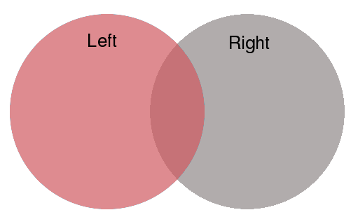

In [39]:
Image('./venn_diag.png')

Note that we have some `NaN` values in our rows - these are papers in the sample which presumably had zero citations

In [40]:
merged[merged['either'].isnull()]

,index,volField,volTitle,volID,volCoder,volWoS,volTop200Econ,volGScites,totalCites,replication,extension,either
36,36,Behavioral/Exp.,Preemption Games: Theory and Experiment,72,1.0,1,0.0,18,19.0,NaN,NaN,NaN
64,64,Macro/Int/Trade,Technology Adoption with Exit in Imperfectly Informed Equity Markets,38,2.0,1,0.0,7,8.0,NaN,NaN,NaN


We will fill these is as 0

In [41]:
merged[['replication', 'extension', 'either']] = merged[['replication', 'extension', 'either']].fillna(0)
merged[merged['volTitle'] == 'Preemption Games: Theory and Experiment']

,index,volField,volTitle,volID,volCoder,volWoS,volTop200Econ,volGScites,totalCites,replication,extension,either
36,36,Behavioral/Exp.,Preemption Games: Theory and Experiment,72,1.0,1,0.0,18,19.0,0.0,0.0,0.0


# Plotting with Matplotlib

`matplotlib` is a 2D plotting library that was initially based on MATLAB plotting

There are two "interfaces" to `matplotlib` - a MATLAB-style interface and an object-orientated interface

In [42]:
# Import the package

import matplotlib.pyplot as plt

## Basic plotting

`pandas` dataframes and series have a few built-in plotting methods, such as `.plot()`, to easily return a `matplotlib` object with your data

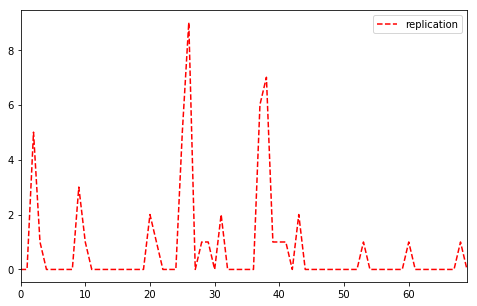

In [43]:
merged.plot(y='replication', figsize=(8, 5), color='red', linestyle='--')
plt.show()

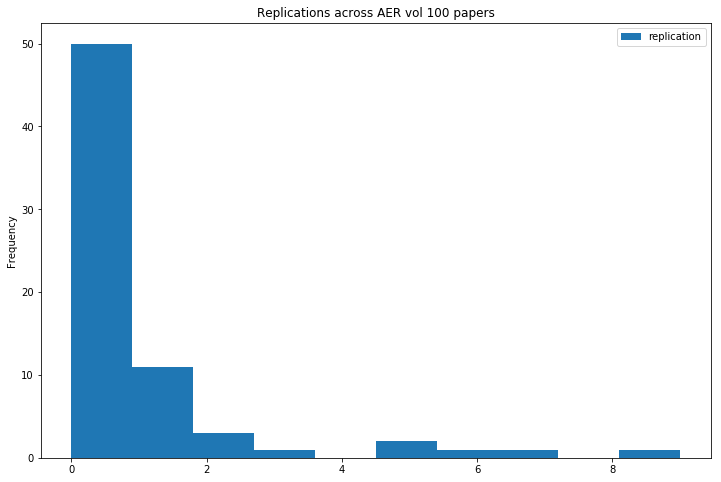

In [44]:
merged.plot(y='replication', figsize=(12, 8), kind='hist')
plt.title('Replications across AER vol 100 papers')
plt.show()

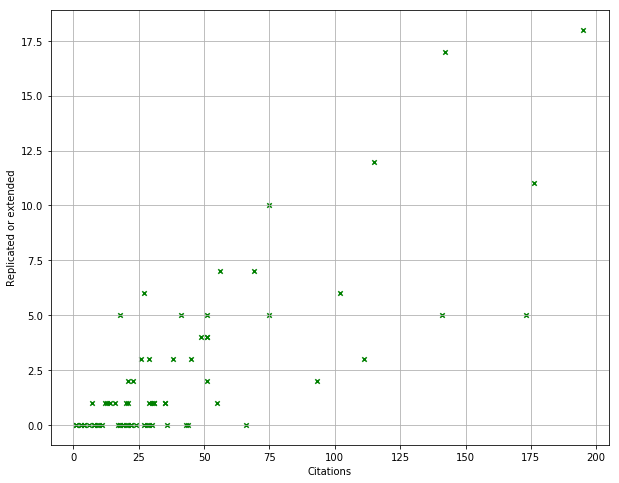

In [45]:
merged.plot(x='volWoS', y='either', kind='scatter', marker='x', c='green', figsize=(10, 8))
plt.xlabel('Citations')
plt.ylabel('Replicated or extended')
plt.grid()
plt.show()

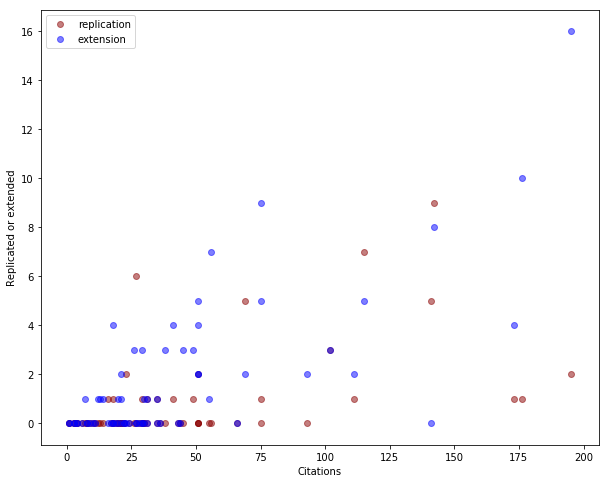

In [46]:
plt.figure(figsize=(10, 8))
plt.scatter(x=merged['volWoS'], y=merged['replication'], c='darkred' ,alpha=0.5)
plt.scatter(x=merged['volWoS'], y=merged['extension'], c='blue', alpha=0.5)
plt.xlabel('Citations')
plt.ylabel('Replicated or extended')
plt.legend()
plt.show()

### Exercises

#### Try to recreate this plot. Hints:
* Use `GroupBy`
* Use `plt.xticks(rotation=35)` to adjust the tick labels

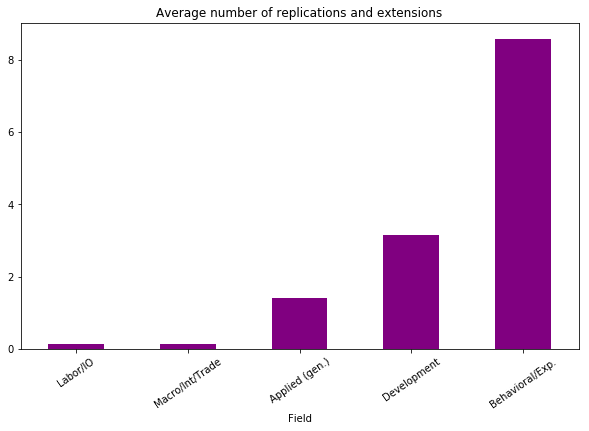

In [47]:
Image('./plot_exer1.png')

<button data-toggle="collapse" data-target="#sol10" class='btn btn-primary'>Solution</button>
<div id="sol10" class="collapse">
```python
to_plot = merged[['volField', 'either']].groupby('volField').mean()
to_plot.sort_values(by='either').plot(kind='bar', color='purple', figsize=(10, 6))
plt.title('Average number of replications')
plt.xlabel('Field')
plt.xticks(rotation=35)
plt.show()
```

## Object-orientated plotting

* `matplotlib`'s OOP interface allows greater flexibility for plotting - recommended for creating more complicated plots
* We will be working with two objects - `Figure` and `Axes`

In [48]:
fig, ax = plt.subplots(figsize=(10, 8))

In [49]:
type(fig)

matplotlib.figure.Figure

In [50]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

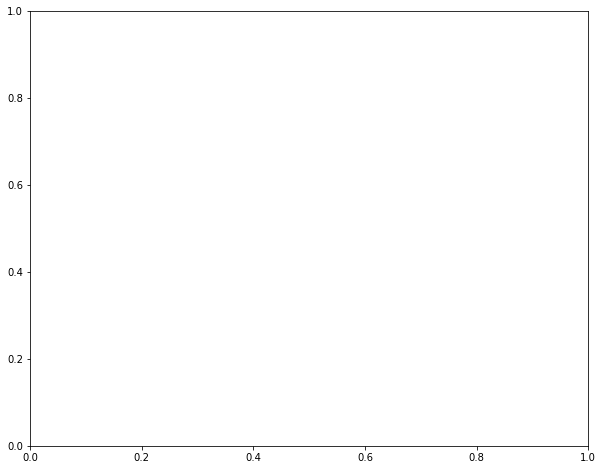

In [51]:
fig
plt.show()

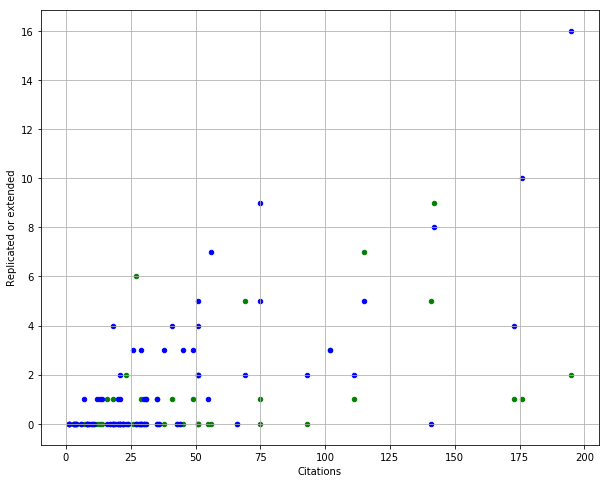

In [52]:
fig, ax = plt.subplots(figsize=(10, 8))
merged.plot(x='volWoS', y='replication', kind='scatter', c='green', ax=ax)
merged.plot(x='volWoS', y='extension', kind='scatter', c='blue', ax=ax)
plt.xlabel('Citations')
plt.ylabel('Replicated or extended')
plt.grid()
plt.show()

We can use the OOP interface to create multiple plots in one figure

In [53]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

In [54]:
axes

array([<matplotlib.axes._subplots.AxesSubplot object at 0x117ae7b70>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11807e518>], dtype=object)

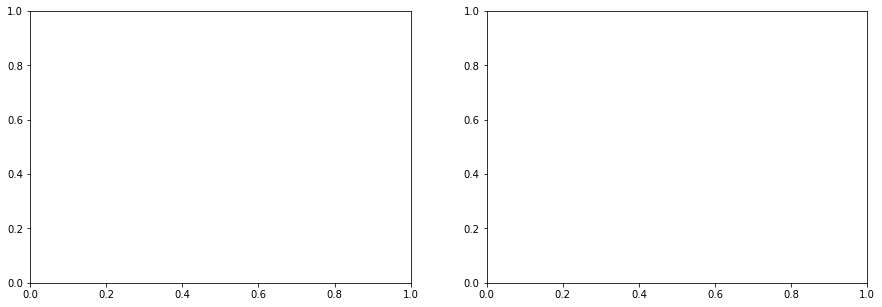

In [55]:
fig

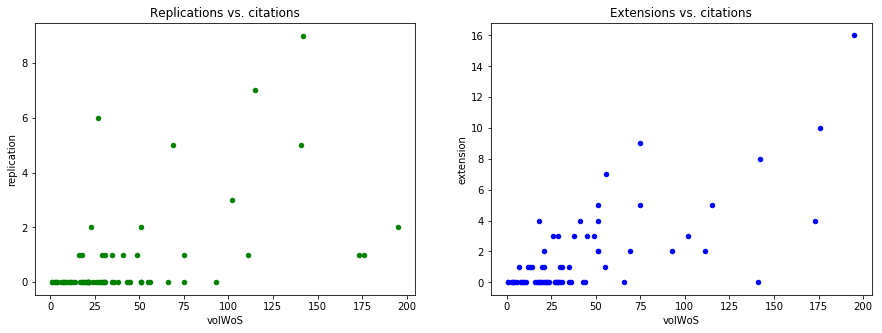

In [56]:
merged.plot(x='volWoS', y='replication', kind='scatter', c='green', ax=axes[0])
merged.plot(x='volWoS', y='extension', kind='scatter', c='blue', ax=axes[1])
axes[0].set_title('Replications vs. citations')
axes[1].set_title('Extensions vs. citations')
fig
plt.show()

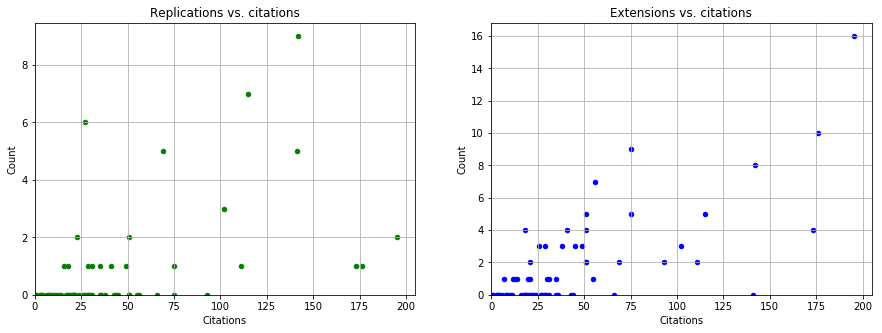

In [57]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

merged.plot(x='volWoS', y='replication', kind='scatter', c='green', ax=axes[0])
merged.plot(x='volWoS', y='extension', kind='scatter', c='blue', ax=axes[1])
axes[0].set_title('Replications vs. citations')
axes[1].set_title('Extensions vs. citations')

for ax in axes:
    ax.grid()
    ax.set(xlim=0, ylim=0, xlabel='Citations', ylabel='Count')
    
fig
plt.show()

### Exercise

#### Try to recreate the figure below that contains three plots for each different citation measure, with replications & extensions vs. citations

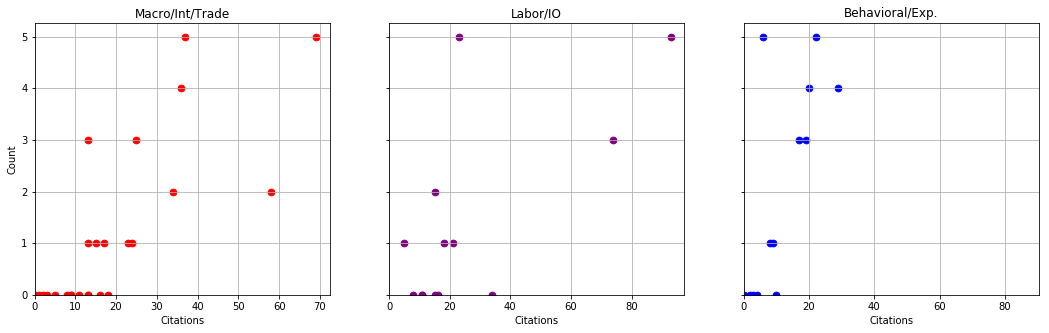

In [65]:
Image('./plot_exer2.png')

<button data-toggle="collapse" data-target="#sol11" class='btn btn-primary'>Solution</button>
<div id="sol11" class="collapse">
```python
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5), sharey=True)

to_plot = ['Macro/Int/Trade', 'Labor/IO', 'Behavioral/Exp.']
colors = ['red', 'purple', 'blue']

for ax, plot, color in zip(axes, to_plot, colors):
    merged[merged['volField'] == plot].plot.scatter(x='volTop200Econ', y='either', s=45, ax=ax, color=color)
    ax.set(xlim=0, ylim=0, xlabel='Citations', ylabel='Count', title=plot)
    ax.grid()

fig
plt.show()
```

## Some examples using Seaborn

In [68]:
# Import the package

import seaborn as sns

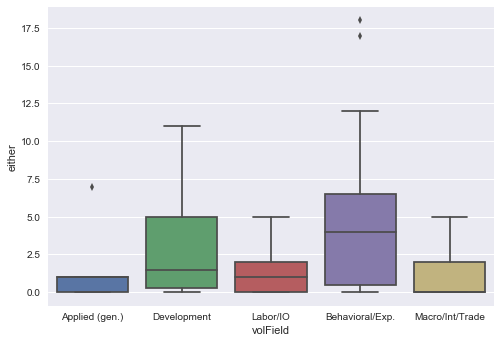

In [67]:
sns.boxplot(x='volField', y='either', data=merged)
plt.show()

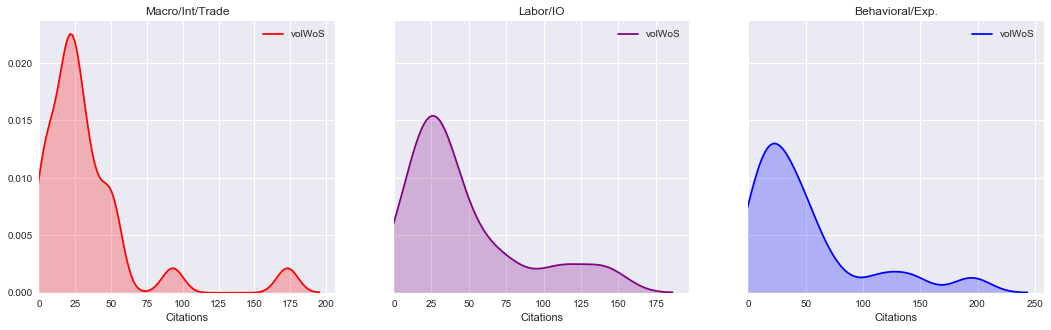

In [62]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5), sharey=True)

to_plot = ['Macro/Int/Trade', 'Labor/IO', 'Behavioral/Exp.']
colors = ['red', 'purple', 'blue']

for ax, plot, color in zip(axes, to_plot, colors):
    sns.kdeplot(merged[merged['volField'] == plot].loc[:, 'volWoS'], ax=ax, color=color, shade=True)
    ax.set(xlim=0, ylim=0, xlabel='Citations', title=plot)

fig
plt.show()

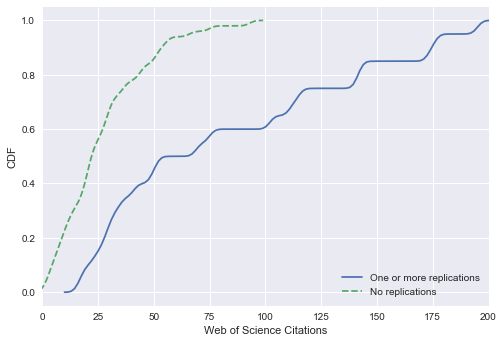

In [63]:
merged['replicated'] = merged['replication'] > 0
sns.kdeplot(merged[merged['replicated'] == True].loc[:, 'volWoS'], cumulative=True, bw=2)
sns.kdeplot(merged[merged['replicated'] == False].loc[:, 'volWoS'], cumulative=True, linestyle='--', bw=2)
plt.xlim(0, 200)
plt.xlabel('Web of Science Citations')
plt.ylabel('CDF')
plt.legend(['One or more replications', 'No replications'])
plt.show()

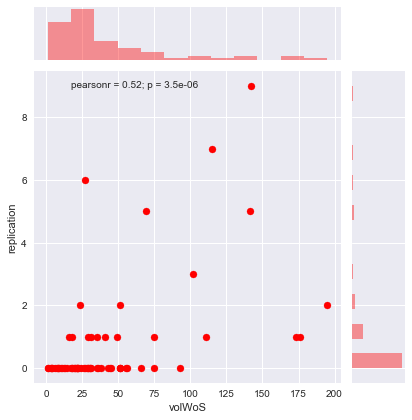

In [64]:
sns.jointplot(x='volWoS', y='replication', data=merged, color='red')
plt.show()